In [1]:
from GQLib.Framework import Framework
from GQLib.Optimizers import MPGA, PSO, SA, SGA

In [ ]:
start_date = "10/04/2006"
end_date = "14/11/2016"

# ETUDE DAILY

In [5]:
fw_wti = Framework('daily')
data_wti = fw_wti.select_sample(fw_wti.data, start_date, end_date)
fw_uso = Framework('daily', is_uso=True)
data_uso = fw_uso.select_sample(fw_uso.data, start_date, end_date)
dates_wti = fw_wti.global_dates[data_wti[:, 0].astype(int)]
dates_uso = fw_uso.global_dates[data_uso[:, 0].astype(int)]

(array([12418., 13149., 13879., 14610., 15340., 16071., 16801., 17532.]),
 [Text(12418.0, 0, '2004'),
  Text(13149.0, 0, '2006'),
  Text(13879.0, 0, '2008'),
  Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018')])

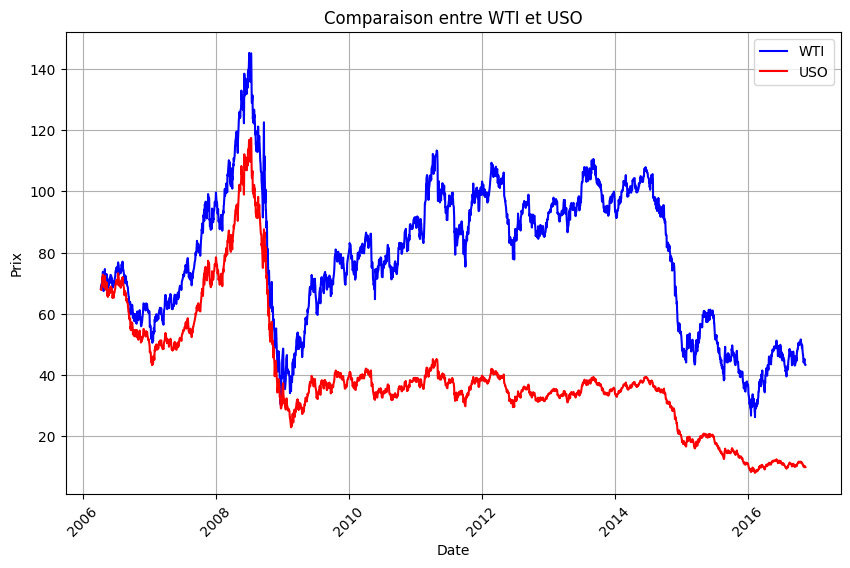

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(dates_wti, data_wti[:, 1], label='WTI', color='blue', linestyle='-')
plt.plot(dates_uso, data_uso[:, 1], label='USO', color='red', linestyle='-')
plt.title('Comparaison entre WTI et USO')
# Ajouter des labels d'axes
plt.xlabel('Date')
plt.ylabel('Prix')
# Ajouter une légende
plt.legend()
# Ajouter une grille
plt.grid(True)
# Formater l'axe des x pour afficher les dates correctement (si ce sont des objets datetime ou Timestamp)
plt.xticks(rotation=45)

In [17]:

import numpy as np
common_dates = np.intersect1d(dates_wti, dates_uso)

# Filtrer les données de data_wti et data_uso pour ne garder que les dates communes
filtered_wti = data_wti[np.isin(dates_wti, common_dates)]
filtered_uso = data_uso[np.isin(dates_uso, common_dates)]

# Calculer la corrélation entre les prix des deux séries pour les dates communes
correlation = np.corrcoef(filtered_wti[:, 1], filtered_uso[:, 1])[0, 1]

print(f"La corrélation entre WTI et USO est : {correlation}")

La corrélation entre WTI et USO est : 0.6029338170538019


## WEEKLY

In [18]:
fw_wti = Framework('weekly')
data_wti = fw_wti.select_sample(fw_wti.data, start_date, end_date)
fw_uso = Framework('weekly', is_uso=True)
data_uso = fw_uso.select_sample(fw_uso.data, start_date, end_date)
dates_wti = fw_wti.global_dates[data_wti[:, 0].astype(int)]
dates_uso = fw_uso.global_dates[data_uso[:, 0].astype(int)]

(array([12418., 13149., 13879., 14610., 15340., 16071., 16801., 17532.]),
 [Text(12418.0, 0, '2004'),
  Text(13149.0, 0, '2006'),
  Text(13879.0, 0, '2008'),
  Text(14610.0, 0, '2010'),
  Text(15340.0, 0, '2012'),
  Text(16071.0, 0, '2014'),
  Text(16801.0, 0, '2016'),
  Text(17532.0, 0, '2018')])

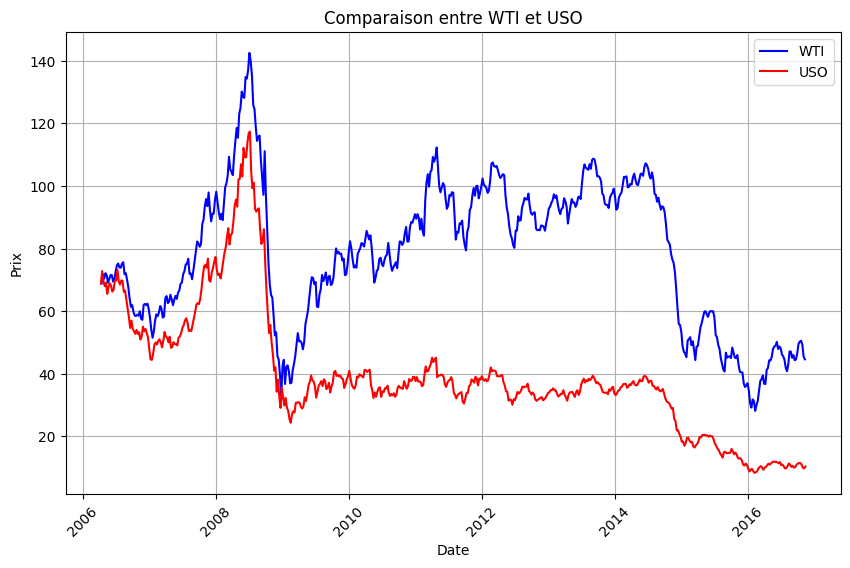

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(dates_wti, data_wti[:, 1], label='WTI', color='blue', linestyle='-')
plt.plot(dates_uso, data_uso[:, 1], label='USO', color='red', linestyle='-')
plt.title('Comparaison entre WTI et USO')
# Ajouter des labels d'axes
plt.xlabel('Date')
plt.ylabel('Prix')
# Ajouter une légende
plt.legend()
# Ajouter une grille
plt.grid(True)
# Formater l'axe des x pour afficher les dates correctement (si ce sont des objets datetime ou Timestamp)
plt.xticks(rotation=45)

In [23]:
correlation = np.corrcoef(data_wti[:, 1], data_uso[1:, 1])[0, 1]

print(f"La corrélation entre WTI et USO est : {correlation}")

La corrélation entre WTI et USO est : 0.5978794695728392


## Generation des TC

In [ ]:
fw_uso = Framework("daily", is_uso = True)
# On renseigne les dates du sample et l'optimiseur à utiliser
optimizer = MPGA()
results = fw_uso.process("29/04/2011", "01/08/2015", optimizer)

# On check la significativité des résultats
best_results = fw_uso.analyze(results)
# On peut visualiser les résultats finaux
fw_uso.visualize(best_results)

Processing subintervals:  24%|██▍       | 22/90 [05:09<17:47, 15.69s/subinterval]